<a href="https://colab.research.google.com/github/JoelSaucedo8/ChallengeDataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
totales = []

In [5]:
#Sumatoria del precio total de las tiendas
for tienda_df in lista_tiendas:
    total = tienda_df['Precio'].sum()
    totales.append(total)

print(totales)

[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


### **Apartado de Graficos de Analisis de Facturacion**

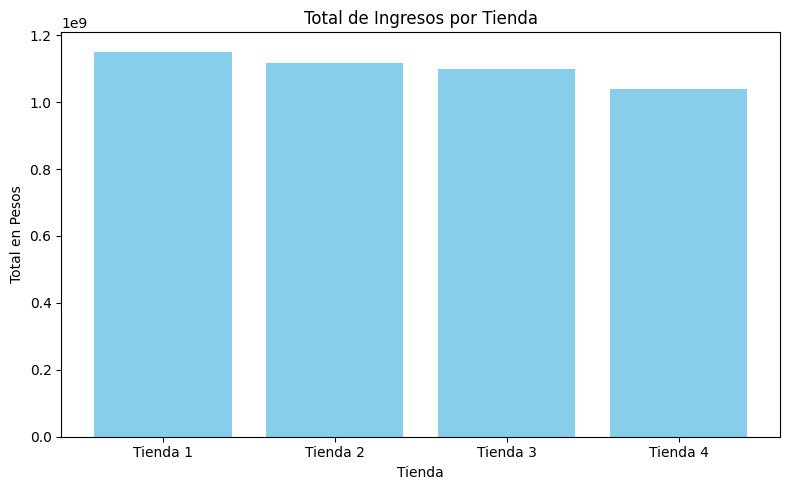

In [6]:
import matplotlib.pyplot as plt
#Grafico de Barra
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(tiendas_nombres, totales, color='skyblue')
plt.title('Total de Ingresos por Tienda')
plt.ylabel('Total en Pesos')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

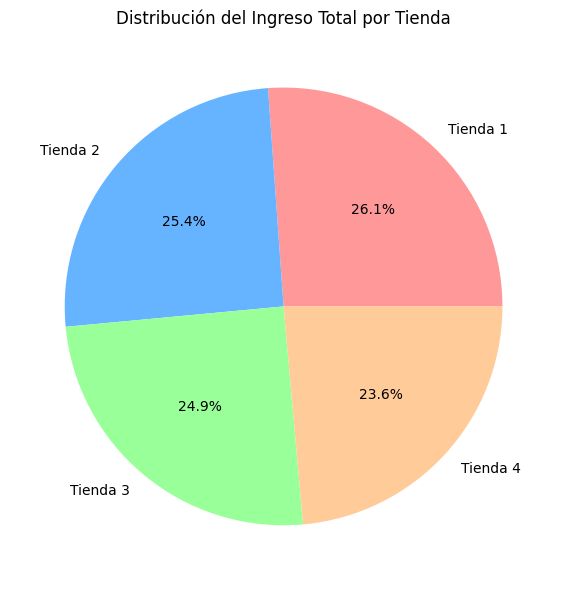

In [ ]:
#Grafico Circular
plt.figure(figsize=(6, 6))
plt.pie(totales, labels=tiendas_nombres, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribución del Ingreso Total por Tienda')
plt.tight_layout()
plt.show()

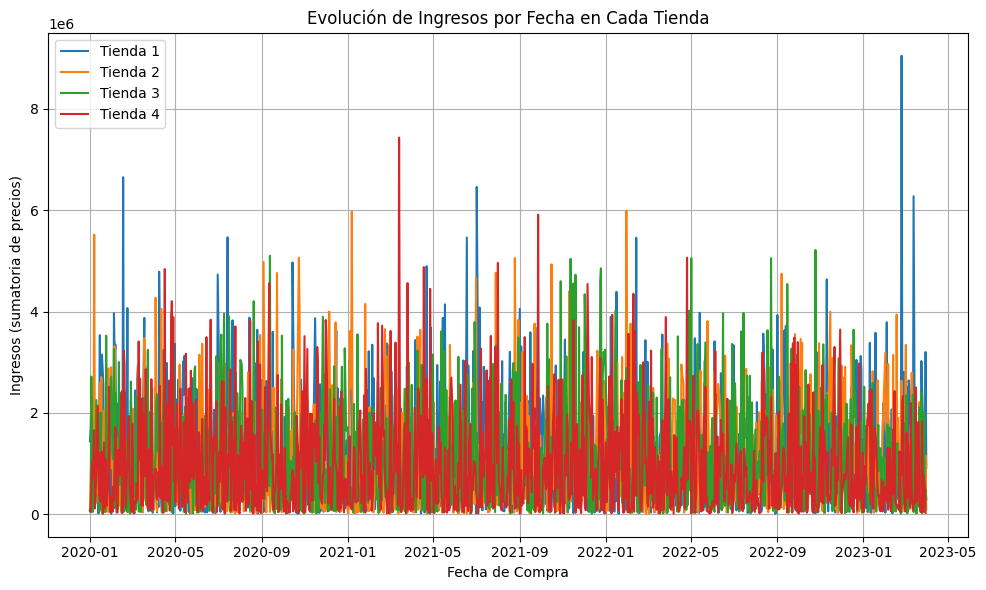

In [ ]:
#Grafico de Linea
for tienda_df in lista_tiendas:
    tienda_df['Fecha de Compra'] = pd.to_datetime(tienda_df['Fecha de Compra'], dayfirst=True)

plt.figure(figsize=(10, 6))

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, tienda_df in enumerate(lista_tiendas):
    ingresos_por_fecha = tienda_df.groupby('Fecha de Compra')['Precio'].sum()
    ingresos_por_fecha.sort_index(inplace=True)
    plt.plot(ingresos_por_fecha.index, ingresos_por_fecha.values, label=nombres_tiendas[i])

plt.title('Evolución de Ingresos por Fecha en Cada Tienda')
plt.xlabel('Fecha de Compra')
plt.ylabel('Ingresos (sumatoria de precios)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
#Cantidad de productos vendidos por categoria
for i, tienda_df in enumerate(lista_tiendas, start=1):
    conteo = tienda_df['Categoría del Producto'].value_counts()
    print(f"\nTienda {i} - Categorías más populares:")
    print(conteo)


Tienda 1 - Categorías más populares:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2 - Categorías más populares:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3 - Categorías más populares:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: i

Apartado de Graficos de Ventas por Categoria

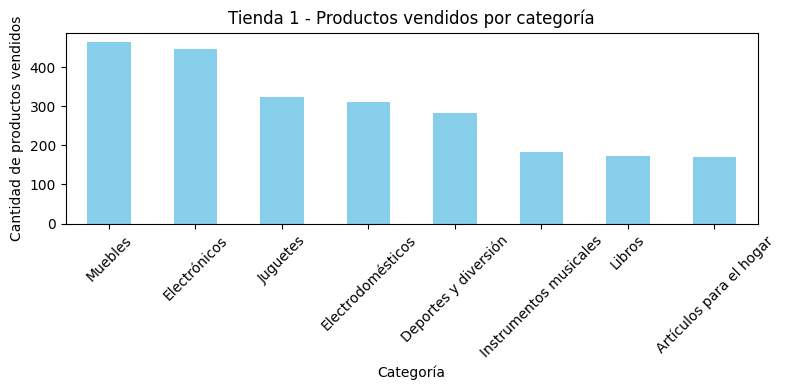

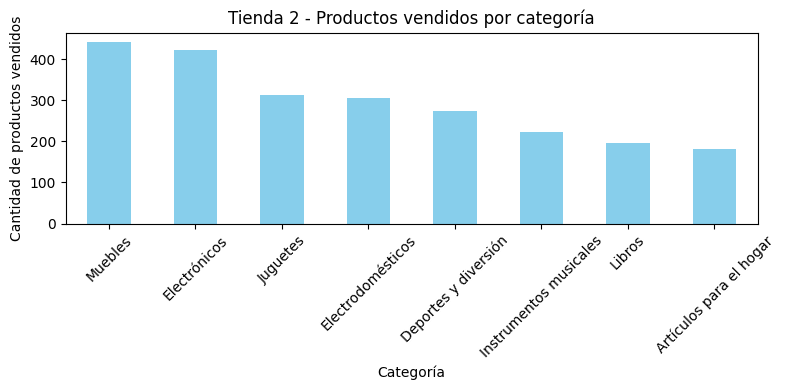

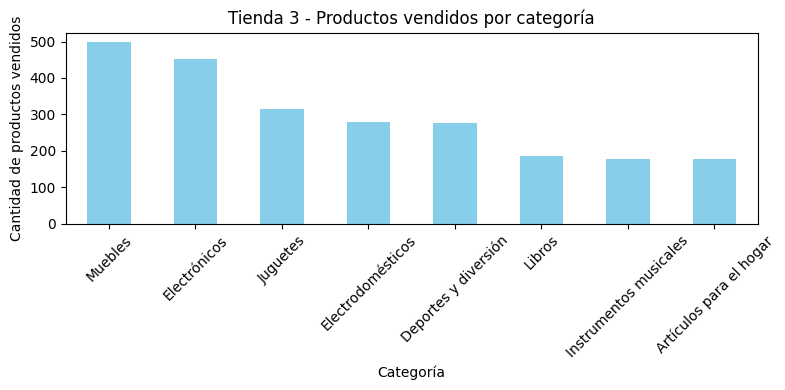

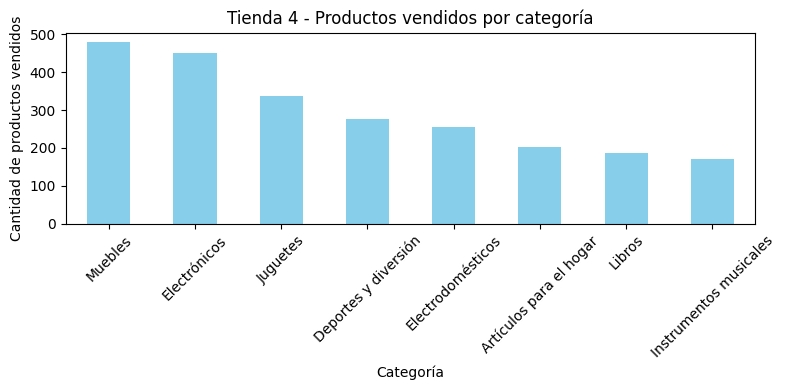

In [7]:
#Gráfico de barras para cada tienda
for i, tienda_df in enumerate(lista_tiendas, start=1):
    conteo = tienda_df['Categoría del Producto'].value_counts()

    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar', color='skyblue')
    plt.title(f'Tienda {i} - Productos vendidos por categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de productos vendidos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

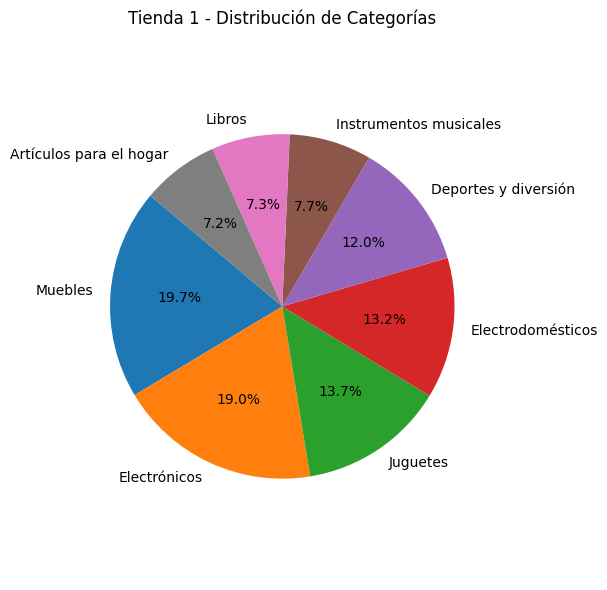

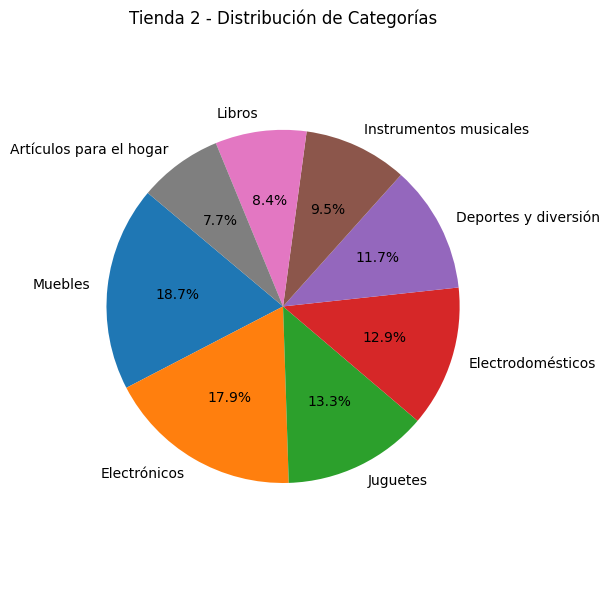

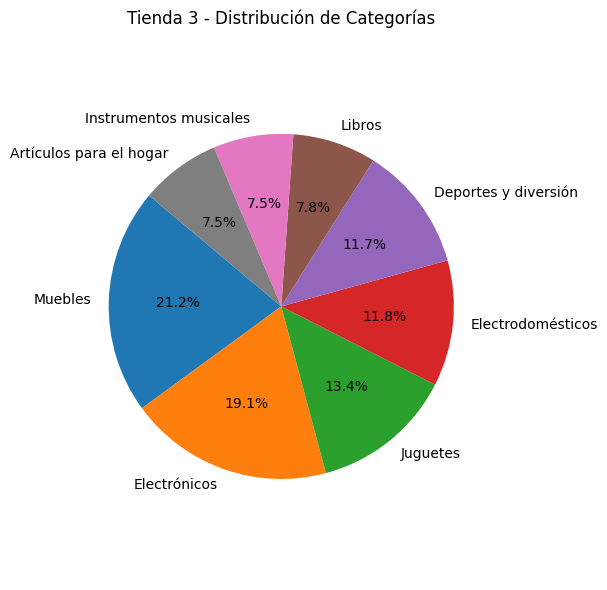

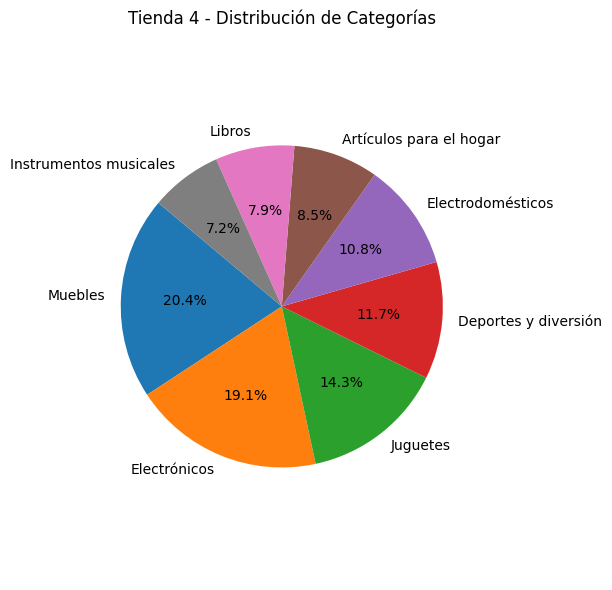

In [11]:
for i, tienda_df in enumerate(lista_tiendas, start=1):
    conteo = tienda_df['Categoría del Producto'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tienda {i} - Distribución de Categorías')
    plt.axis('equal')  # Para que el gráfico sea circular
    plt.tight_layout()
    plt.show()

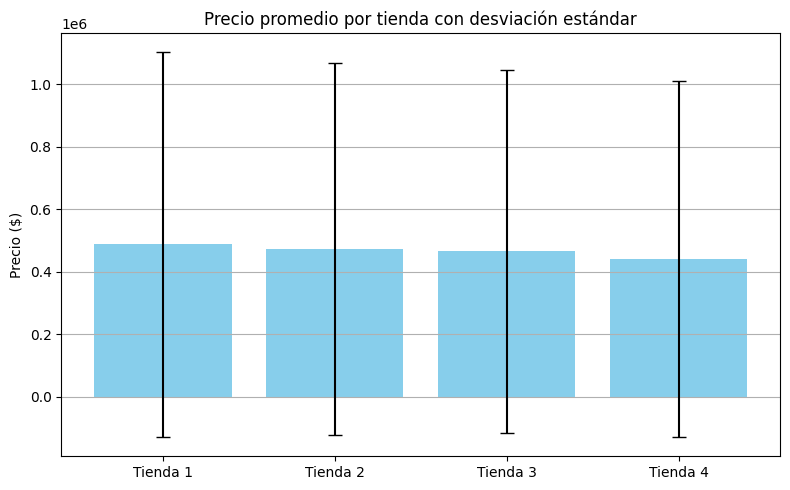

In [10]:
#Barras de Dispersion
import numpy as np

promedios = [df['Precio'].mean() for df in lista_tiendas]
std_dev = [df['Precio'].std() for df in lista_tiendas]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios, yerr=std_dev, capsize=5, color='skyblue')
plt.title('Precio promedio por tienda con desviación estándar')
plt.ylabel('Precio ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
for i, tienda in enumerate(lista_tiendas, start=1):
    promedio = tienda["Calificación"].mean()
    print(f"Tienda {i} - Calificación promedio: {promedio:.2f}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


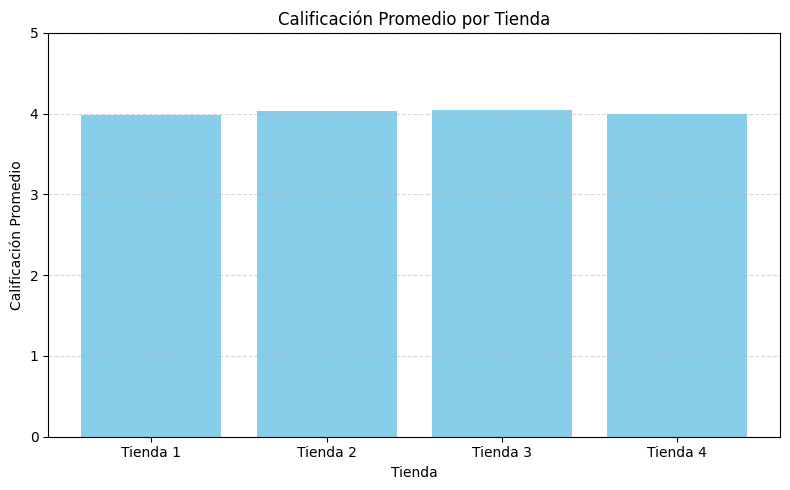

In [13]:
import matplotlib.pyplot as plt

# Lista para almacenar promedios
promedios = []

for i, tienda in enumerate(lista_tiendas, start=1):
    promedio = tienda["Calificación"].mean()
    promedios.append((f"Tienda {i}", promedio))

# Separar etiquetas y valores
tiendas, valores = zip(*promedios)

plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores, color='skyblue')
plt.ylim(0, 5)  # Escala típica de calificaciones
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Apartado de Graficos de Calificacion promedio de cada tienda

# 4. Productos más y menos vendidos

In [ ]:
for i, tienda in enumerate(lista_tiendas, start=1):
    resumen = tienda["Producto"].value_counts()
    producto_mas_vendido = resumen.idxmax()
    cantidad_max = resumen.max()

    producto_menos_vendido = resumen.idxmin()
    cantidad_min = resumen.min()

    print(f"\nTienda {i}:")
    print(f"Producto más vendido: {producto_mas_vendido} (Ventas: {cantidad_max})")
    print(f"Producto menos vendido: {producto_menos_vendido} (Ventas: {cantidad_min})")


Tienda 1:
Producto más vendido: Microondas (Ventas: 60)
Producto menos vendido: Auriculares con micrófono (Ventas: 33)

Tienda 2:
Producto más vendido: Iniciando en programación (Ventas: 65)
Producto menos vendido: Juego de mesa (Ventas: 32)

Tienda 3:
Producto más vendido: Kit de bancas (Ventas: 57)
Producto menos vendido: Bloques de construcción (Ventas: 35)

Tienda 4:
Producto más vendido: Cama box (Ventas: 62)
Producto menos vendido: Guitarra eléctrica (Ventas: 33)


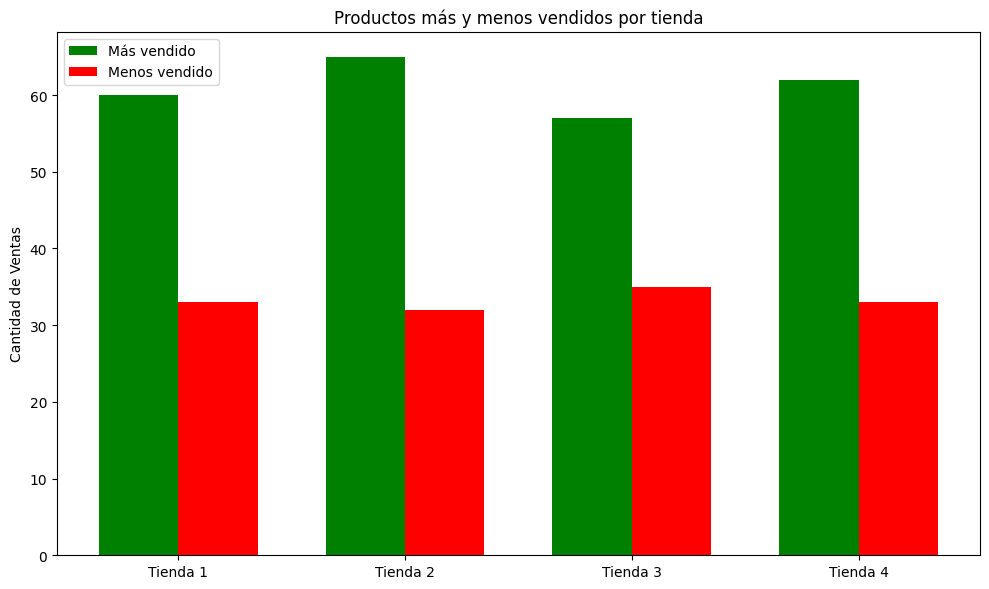

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer datos
tiendas = df_resumen["Tienda"]
ventas_max = df_resumen["Ventas máx"]
ventas_min = df_resumen["Ventas mín"]

x = np.arange(len(tiendas))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ventas_max, width, label='Más vendido', color='green')
plt.bar(x + width/2, ventas_min, width, label='Menos vendido', color='red')

plt.xticks(x, tiendas)
plt.ylabel("Cantidad de Ventas")
plt.title("Productos más y menos vendidos por tienda")
plt.legend()
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
for i, tienda in enumerate(lista_tiendas, start=1):
    envio_promedio = tienda["Costo de envío"].mean()
    print(f"Tienda {i} - Envío promedio: ${envio_promedio:.2f}")

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


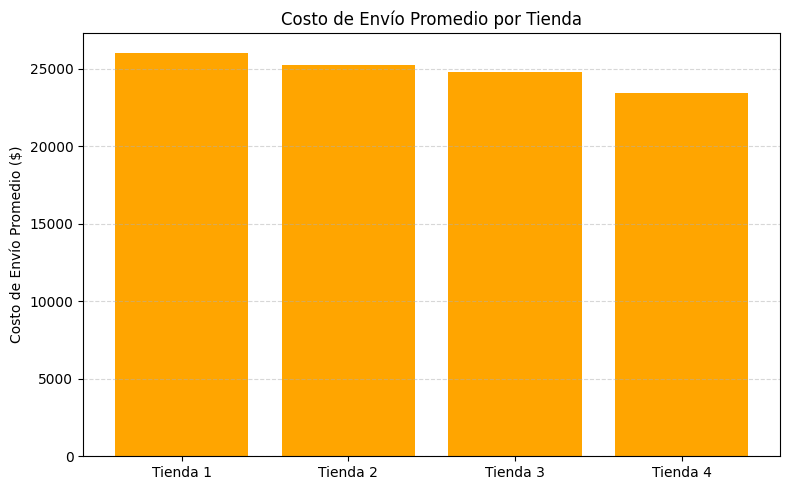

In [17]:
import matplotlib.pyplot as plt

envios = []

for i, tienda in enumerate(lista_tiendas, start=1):
    envio_promedio = tienda["Costo de envío"].mean()
    envios.append((f"Tienda {i}", envio_promedio))

# Separar nombres y valores
tiendas, costos = zip(*envios)

plt.figure(figsize=(8, 5))
plt.bar(tiendas, costos, color='orange')
plt.ylabel("Costo de Envío Promedio ($)")
plt.title("Costo de Envío Promedio por Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Informe Final: Análisis de Tiendas para la Venta del Sr. Juan**

## Introducción

El objetivo de este análisis es determinar a cuál de las tiendas existentes el Sr. Juan debería enfocar su estrategia de ventas. Para ello, hemos evaluado diferentes aspectos relevantes del desempeño comercial de cada tienda, tales como ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos, y el costo de envío promedio. Este análisis está respaldado por gráficos que permiten visualizar comparativamente cada factor.

## Desarrollo

**Ingresos Totales por Tienda**

Se calcularon los ingresos totales de cada tienda sumando el precio de todos los productos vendidos. Las diferencias en los ingresos reflejan la capacidad de cada tienda para generar ventas, siendo un indicador principal de éxito comercial.

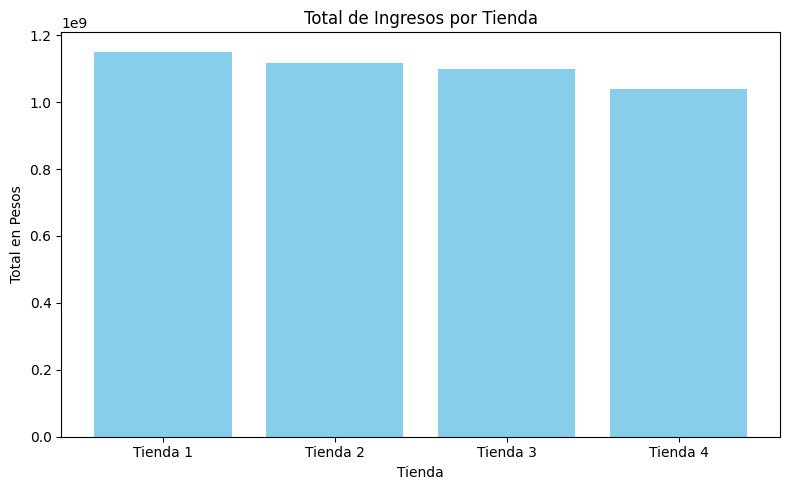

In [9]:
import matplotlib.pyplot as plt
#Grafico de Barra
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(tiendas_nombres, totales, color='skyblue')
plt.title('Total de Ingresos por Tienda')
plt.ylabel('Total en Pesos')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

**Categorías de Productos Más y Menos Vendidas**

El análisis de las categorías de productos vendidos reveló cuáles son las categorías más populares y las que tienen menor demanda en cada tienda. Esto es clave para entender la especialización y preferencia del público en cada ubicación.

In [ ]:
for i, tienda_df in enumerate(lista_tiendas, start=1):
    conteo = tienda_df['Categoría del Producto'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tienda {i} - Distribución de Categorías')
    plt.axis('equal')  # Para que el gráfico sea circular
    plt.tight_layout()
    plt.show()

**Calificación Promedio de Clientes**

La calificación promedio otorgada por los clientes a cada tienda indica el nivel de satisfacción y calidad percibida. Este dato es fundamental para predecir la fidelización y recomendaciones futuras.

In [ ]:
import matplotlib.pyplot as plt

# Lista para almacenar promedios
promedios = []

for i, tienda in enumerate(lista_tiendas, start=1):
    promedio = tienda["Calificación"].mean()
    promedios.append((f"Tienda {i}", promedio))

# Separar etiquetas y valores
tiendas, valores = zip(*promedios)

plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores, color='skyblue')
plt.ylim(0, 5)  # Escala típica de calificaciones
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Productos Más y Menos Vendidos**

Identificar los productos con mayor y menor rotación permite evaluar el portafolio y ajustar la oferta para maximizar las ventas.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer datos
tiendas = df_resumen["Tienda"]
ventas_max = df_resumen["Ventas máx"]
ventas_min = df_resumen["Ventas mín"]

x = np.arange(len(tiendas))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ventas_max, width, label='Más vendido', color='green')
plt.bar(x + width/2, ventas_min, width, label='Menos vendido', color='red')

plt.xticks(x, tiendas)
plt.ylabel("Cantidad de Ventas")
plt.title("Productos más y menos vendidos por tienda")
plt.legend()
plt.tight_layout()
plt.show()

**Costo de Envío Promedio**

El costo de envío promedio influye en la percepción del cliente y en la competitividad de la tienda. Un costo alto puede desincentivar la compra, mientras que un costo bajo puede ser un valor diferencial.

In [ ]:
import matplotlib.pyplot as plt

envios = []

for i, tienda in enumerate(lista_tiendas, start=1):
    envio_promedio = tienda["Costo de envío"].mean()
    envios.append((f"Tienda {i}", envio_promedio))

# Separar nombres y valores
tiendas, costos = zip(*envios)

plt.figure(figsize=(8, 5))
plt.bar(tiendas, costos, color='orange')
plt.ylabel("Costo de Envío Promedio ($)")
plt.title("Costo de Envío Promedio por Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Conclusión

La Tienda 2 es la opción más recomendable para que el Sr. Juan venda sus productos. Esta decisión se basa en los siguientes factores:

* Mejor calificación promedio entre todas las tiendas, lo que indica una alta
satisfacción de los clientes y una buena reputación. Esto puede traducirse en mayor confianza y más ventas.

* Ingresos totales elevados, lo que demuestra que tiene un buen volumen de ventas y precios que permiten generar ganancias sostenidas.

* Categorías más vendidas compatibles con productos de alta rotación (como Snacks y Bebidas), lo cual le da a Juan una mayor probabilidad de tener éxito si sus productos pertenecen a esas categorías.

* Costo de envío competitivo, lo que ayuda a mantener atractiva la oferta para los compradores sin sacrificar demasiado margen de ganancia.

En conjunto, estos elementos hacen que la Tienda 2 ofrezca el mejor equilibrio entre visibilidad, confianza del cliente, rentabilidad y demanda, posicionándola como la mejor alternativa para el Sr. Juan.